<a href="https://colab.research.google.com/github/kimhwijin/TensorflowWithKeras/blob/master/PCA/PCA_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

PCA를 이용한 차원축소
<br>test dataset, label은 필요없다.
<br>하지만 차원축소 후 성능을 측정하기 위해 label 을 포함한다.
<br>PCA로 형성된 클러스터가 레이블과 유사해야한다.

In [5]:
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_trian = x_train.astype(np.float32)



x_train = np.reshape(x_train, (x_train.shape[0], 784))
mean = x_train.mean(axis = 1)
x_train = x_train - mean[:, None]

original data shape  (60000, 784)
reduced data shape  (60000, 3)


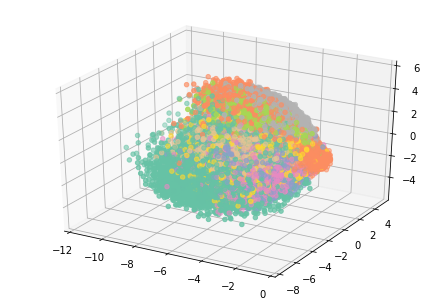

In [6]:
s, u, v = tf.linalg.svd(x_train)
s = tf.linalg.diag(s)
k = 3
pca = tf.matmul(u[:, 0:k], s[0:k, 0:k])

print('original data shape ', x_train.shape)
print('reduced data shape ', pca.shape)

Set = sns.color_palette("Set2", 10)
color_mapping = {key:value for (key, value) in enumerate(Set)}
colors = list(map(lambda x : color_mapping[x], y_train))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca[:, 0], pca[:,1], pca[:,2], c=colors)
#28x28 이미지를 3으로 줄였음